In [54]:
# %load ./dsfs/gradients.py
import random
from typing import Callable, List, TypeVar, Iterator
from dsfs.vector import Vector, scalar_multiply, distance, add

def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x+h) - f(x))/ h


def partial_difference_quotient(
        f: Callable[[Vector], float],
        v: Vector,
        i: int,
        h, float) -> float:
    w = [w_j + (h if j == i else 0) for j,v_j in enumerate(v)]
    return (f(w) - f(v))/h


def estimate_gradient(
        f: Callable[[Vector], float],
        v: Vector,
        h: float = 0.0001) -> List[float]:

    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]


def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)


def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad


T = TypeVar('T')
def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle: random.shuffle(batch_starts) 

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start: end]



def linear_gradient_descent(
        xs: List[float],
        ys: List[float],
        num_epochs: int,
        learning_rate: float,
        initial_weights: List[float]) -> Iterator[List[float]]:
    theta = initial_weights
    for epoch in range(num_epochs):
        grad = vector_mean([linear_gradient(x, y, theta) for x,y in inputs])
        theta = gradient_step(theta, gradient=grad, step_size=-learning_rate)
        yield epoch, theta


def minibatch_linear_gradient_descent(
        xs: List[float],
        ys: List[float],
        num_epochs: int,
        learning_rate: float,
        initial_weights: List[float],
        batch_size: int = 20,
        shuffle: bool = False) -> Iterator[List[float]]:
    theta = initial_weights
    for epoch in range(num_epochs):
        for batch in minibatches(inputs, batch_size=batch_size, shuffle=shuffle):
            grad = vector_mean([linear_gradient(x, y, theta) for x,y in batch])
            theta = gradient_step(theta, gradient=grad, step_size=-learning_rate)
        yield epoch, theta
        

def stochastic_linear_gradient_descent(
        xs: List[float],
        ys: List[float],
        num_epochs: int,
        learning_rate: float,
        initial_weights: List[float]) -> Iterator[List[float]]:
    theta = initial_weights
    for epoch in range(num_epochs):
        for x, y in zip(xs, ys):
            grad = linear_gradient(x, y, theta)
            theta = gradient_step(theta, gradient=grad, step_size=-learning_rate)
        yield epoch, theta

                    



In [55]:
def square(x: float)  -> float:
    return x * x

def square_derivative(x: float) -> float:
    return 2 * x


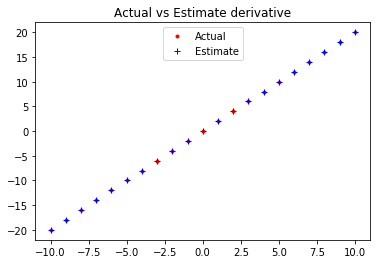

In [56]:
xs = range(-10, 11)
actuals = [square_derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

import matplotlib.pyplot as plt
plt.title("Actual vs Estimate derivative")
plt.plot(xs, actuals, 'r.', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [57]:
import random

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]
display(v)

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)  # Taking a negative gradient step.
    if epoch % 50 == 0:
        print(epoch, v)
print(epoch, v)
assert distance(v, [0,0,0]) < 0.001

[9.496345192687919, -1.5522278699584895, 1.6274623028871247]

0 [9.306418288834161, -1.5211833125593197, 1.5949130568293821]
50 [3.3891153710016315, -0.5539688402885883, 0.5808189776723218]
100 [1.234213060435995, -0.20173865534612628, 0.2115166612874558]
150 [0.44946297537831775, -0.07346710157860394, 0.07702795487414789]
200 [0.16368078795452579, -0.02675449087880795, 0.02805124568428332]
250 [0.059607580185806884, -0.00974317438422918, 0.010215413166890586]
300 [0.021707273407032473, -0.0035481686985377354, 0.0037201437449442694]
350 [0.007905130812202604, -0.0012921354598416101, 0.0013547635574744441]
400 [0.0028788089589266348, -0.00047055655703973895, 0.0004933638113191528]
450 [0.0010483749376042387, -0.000171362430840057, 0.0001796681413346566]
500 [0.00038178636563868703, -6.240500161797426e-05, 6.542968955168885e-05]
550 [0.00013903501863626376, -2.2726009475053712e-05, 2.3827509112237906e-05]
600 [5.063233825767454e-05, -8.276123600187099e-06, 8.677256370676545e-06]
650 [1.843876242536003e-05, -3.013913283841575e-06, 3.1599936765431757

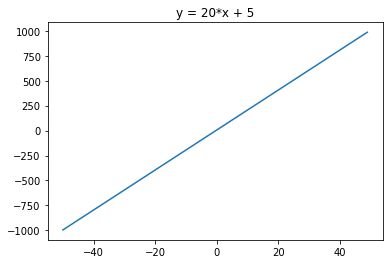

In [58]:


inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
x,y = list(zip(*inputs))
plt.plot(x, y)
plt.title("y = 20*x + 5")
plt.show()

0 [33.8603941190492, -0.37868998302925083]
500 [19.99881425688744, 3.0257370054313735]
1000 [19.999564094915826, 4.274217773046595]
1500 [19.999839751763773, 4.733186590433699]
2000 [19.999941089245922, 4.901913559080623]
2500 [19.99997834311923, 4.963941280508092]
3000 [19.99999203845729, 4.9867440266033825]
3500 [19.999997073162888, 4.995126814452436]
4000 [19.99999892403071, 4.99820851048275]
4500 [19.999999604450174, 4.9993414092980695]


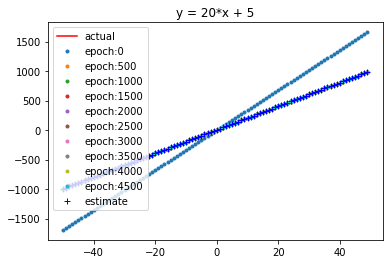

In [63]:
from dsfs.vector import vector_mean

theta =[random.uniform(-1, 1), random.uniform(-1, 1)]  #Starting at a random for the slope and interept

learning_rate = 0.001

xs, ys = list(zip(*inputs))
plt.plot(xs, ys, 'r-', label='actual')

for epoch, theta in linear_gradient_descent(
    xs, 
    ys, 
    num_epochs=5000, 
    initial_weights=theta, 
    learning_rate=learning_rate):
    if epoch % 500 == 0:
        plt.plot(xs, [x*theta[0] + theta[1] for x in xs], '.', label=f'epoch:{epoch}')
        print(epoch, theta)

slope, intercept = theta
xs, ys = list(zip(*inputs))
#plt.plot(xs, ys, 'r-', label='actual')
plt.plot(xs, [x*slope + intercept for x in xs], 'b+', label='estimate')
plt.legend()
plt.title("y = 20*x + 5")
plt.show()


0 [12.295443245607915, -1.0510171859327135]
100 [20.02959362486514, -0.47502772685667555]
200 [20.026548896687967, 0.0882682960782096]
300 [20.02381742414322, 0.5936098345275104]
400 [20.0213669780513, 1.046959512289794]
500 [20.019168645118775, 1.4536664910152044]
600 [20.017196486784766, 1.818529586011571]
700 [20.01542723316678, 2.1458538884062124]
800 [20.013840008494817, 2.439501561759434]
900 [20.012416084794076, 2.702937412488902]


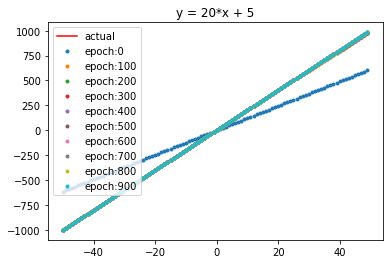

In [60]:
theta =[random.uniform(-1, 1), random.uniform(-1, 1)]  #Starting at a random for the slope and interept


xs, ys = list(zip(*inputs))
plt.plot(xs, ys, 'r-', label='actual')


for epoch, theta in minibatch_linear_gradient_descent(
    xs,
    ys,
    num_epochs=1000,
    initial_weights=theta,
    learning_rate=0.0001,
    batch_size=20,
    shuffle=False,
):
    if epoch % 100 == 0:
        print(epoch, theta)
        plt.plot(xs, [x*theta[0] + theta[1] for x in xs], '.', label=f'epoch:{epoch}')
    
slope, intercept = theta
xs, ys = list(zip(*inputs))
#plt.plot(xs, ys, 'r-', label='actual')
plt.plot(xs, [x*slope + intercept for x in xs], 'b+', label='estimate')
plt.legend()
plt.title("y = 20*x + 5")
plt.show()


0 [20.10982017662468, -0.24177655508721657]
20 [20.089939521693903, 0.7071394193552331]
40 [20.07365781871944, 1.48427364876258]
60 [20.060323583629568, 2.12072368888143]
80 [20.049403237907086, 2.641957522419046]


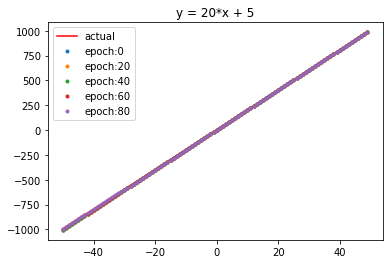

In [62]:
theta =[random.uniform(-1, 1), random.uniform(-1, 1)]  #Starting at a random for the slope and interept


xs, ys = list(zip(*inputs))
plt.plot(xs, ys, 'r-', label='actual')


for epoch, theta in stochastic_linear_gradient_descent(
    xs,
    ys,
    num_epochs=100,
    initial_weights=theta,
    learning_rate=0.0001,
):
    if epoch % 20 == 0:
        print(epoch, theta)
        plt.plot(xs, [x*theta[0] + theta[1] for x in xs], '.', label=f'epoch:{epoch}')
    
slope, intercept = theta
xs, ys = list(zip(*inputs))
plt.legend()
plt.plot(xs, [x*slope + intercept for x in xs], 'b+', label='estimate')
plt.title("y = 20*x + 5")
plt.show()